# Data Evaluation
### In this section, we will try to answer a few questions with the help of the cleaned data we prepared in the Data_Preparing Notebook

In [48]:
import io
import os
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

clean_data_path = '../Datasets/cleaned_survey_results.csv'
data = pd.read_csv(clean_data_path)
data.head(10)


,Age,Employment,RemoteWork,CodingActivities,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly,LearnCodeCoursesCert,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith
0,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18.0,9.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,285000.0,Other,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel
1,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27.0,23.0,"Developer, back-end","5,000 to 9,999 employees",United States of America,250000.0,NaN,Bash/Shell (all shells);Go,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...
2,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,7.0,"Developer, front-end",100 to 499 employees,United States of America,156000.0,NaN,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku
3,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,4.0,"Developer, full-stack",20 to 99 employees,Philippines,23456.0,Other;Codecademy;edX,HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...
4,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,21.0,21.0,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,96828.0,Other,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud
5,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,4.0,3.0,"Developer, full-stack","1,000 to 4,999 employees",United States of America,135000.0,Udemy,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Amazon Web Services (AWS);Digital Ocean
6,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,3.0,"Developer, full-stack",10 to 19 employees,United States of America,80000.0,Codecademy;edX,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Dynamodb;MongoDB;MySQL;Redis;SQLite,Amazon Web Services (AWS);Fly.io;Netlify;Vercel
7,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20.0,15.0,System administrator,100 to 499 employees,Finland,64254.0,Udemy;Pluralsight,C#;JavaScript;PowerShell;Ruby;TypeScript,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Digital Ocean;Microsoft Azure;Netlify
8,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,9.0,"Developer, full-stack",100 to 499 employees,Australia,78003.0,NaN,C#;HTML/CSS;JavaScript;Kotlin;PowerShell;Pytho...,Cosmos DB;Microsoft SQL Server;MySQL;Redis,Digital Ocean;Microsoft Azure;Netlify
9,25-34 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,9.0,"Developer, full-stack",2 to 9 employees,United States of America,75000.0,Codecademy,Bash/Shell (all shells);Elixir;HTML/CSS;JavaSc...,BigQuery;Dynamodb;Elasticsearch;MongoDB;MySQL;...,Amazon Web Services (AWS);Digital Ocean;Fly.io...


## Defining new functions to help us visualize data.


In [49]:
def plot_bar_graph(xy=None,x=None, y=None, hor=False, xlabel="", ylabel="",w=0.9, xl=None, yl=None, title="",indent=None, d={}):
    if not (x and y):
        x = list(xy.index)
        y = list(xy.values)
    x.reverse()
    y.reverse()
    for i in range(len(x)):
        x[i]=d.get(x[i], x[i])
    if(xl and yl): plt.figure(figsize=(xl, yl))
    c = np.random.rand(len(x), 3)
    if hor:
        plt.barh(x, y, color=c)
    else:
        plt.bar(x, y, color=c)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i, v in enumerate(y):
        plt.text(v, i, " "+str(v)+" ", va="center", ha="right" if(indent and v>indent) else "left")

## 1. Age of developers.

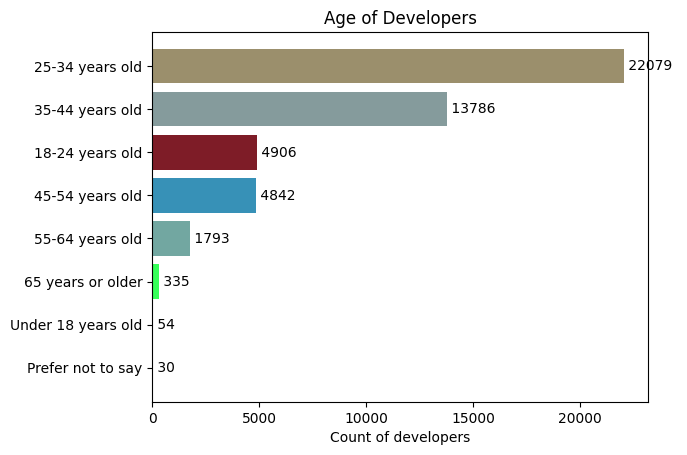

In [50]:
Age_Ranges = data["Age"].value_counts()
plot_bar_graph(
    xy=Age_Ranges,
    hor=True,
    indent=30000,
    xlabel="Count of developers",
    title="Age of Developers"
)

## 2. Demographics of developers

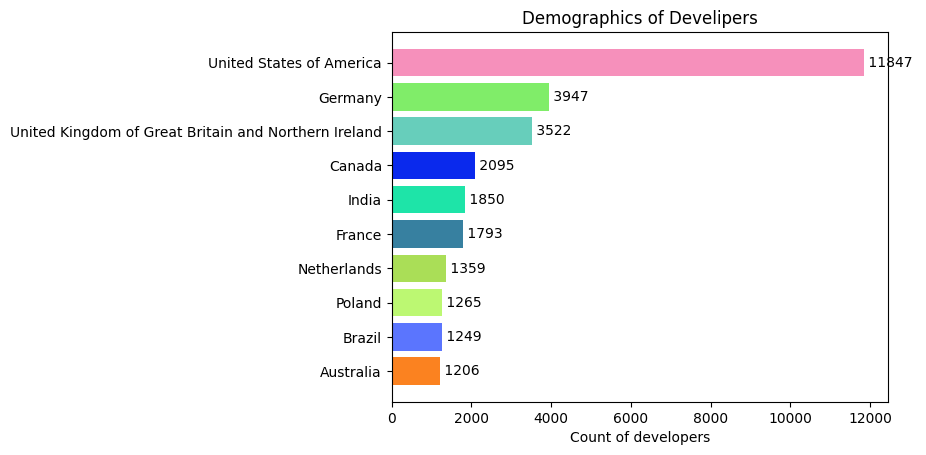

In [51]:
Countries = data["Country"].value_counts().sort_values(ascending=False).head(10)
plot_bar_graph(
    xy= Countries,
    hor=True,
    indent=30000,
    xlabel="Count of developers",
    title="Demographics of Developers"
)

## 3. Work Culture Analysis

/var/folders/t9/dsx6mv5s7kl5ybn8ps1lw3q40000gn/T/ipykernel_16932/1216276058.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




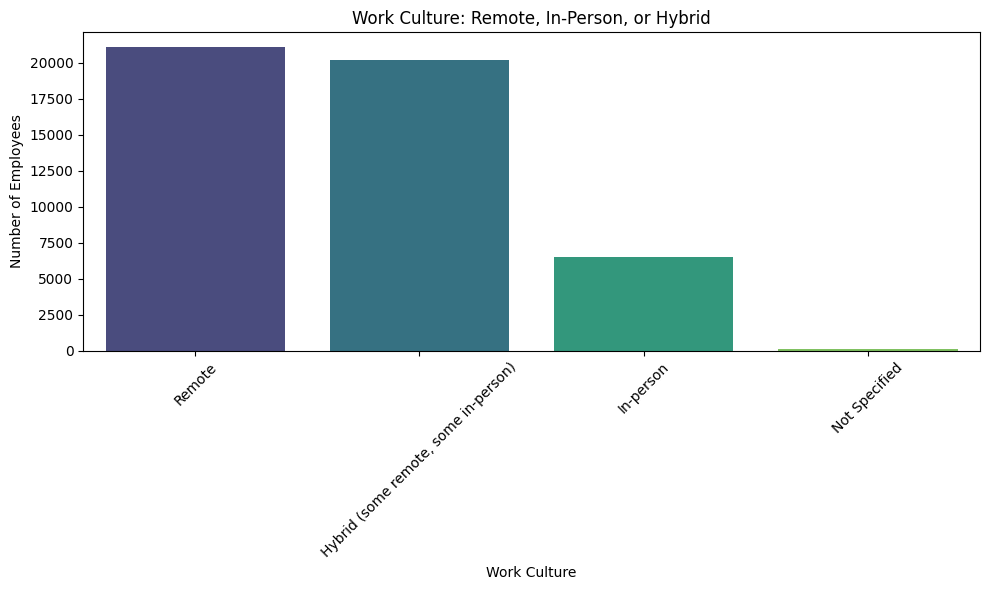

In [52]:
rw = data["RemoteWork"].value_counts()
plt.figure(figsize=(10, 6))

sns.barplot(x=rw.index, y=rw.values, palette='viridis')

plt.title("Work Culture: Remote, In-Person, or Hybrid")
plt.xlabel("Work Culture")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Programming languages and average yearly compensation.

/var/folders/t9/dsx6mv5s7kl5ybn8ps1lw3q40000gn/T/ipykernel_16932/1518021057.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




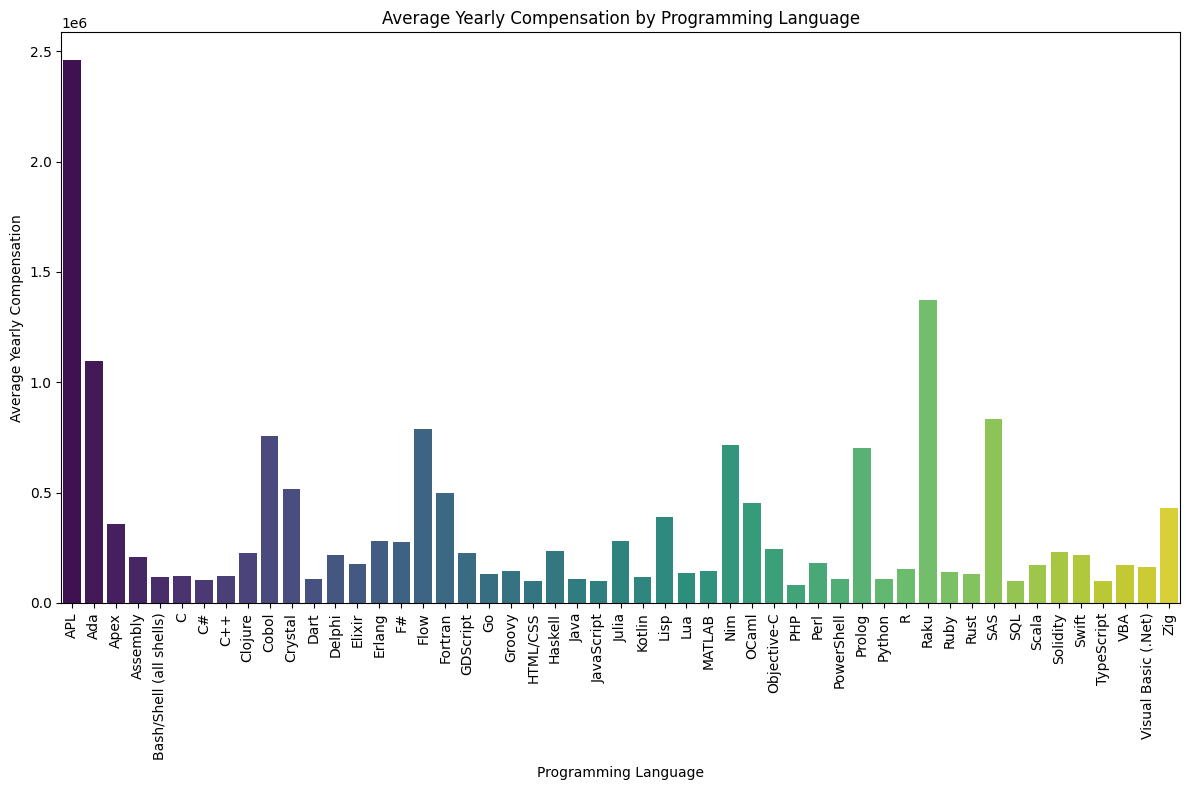

In [53]:
languages = data.assign(LanguageHaveWorkedWith=data['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Group by LanguageHaveWorkedWith and calculate the average ConvertedCompYearly
language_analysis = languages.groupby('LanguageHaveWorkedWith')['ConvertedCompYearly'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=language_analysis, x='LanguageHaveWorkedWith', y='ConvertedCompYearly', palette='viridis')
plt.title('Average Yearly Compensation by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 5. Programming Language Used by Developers

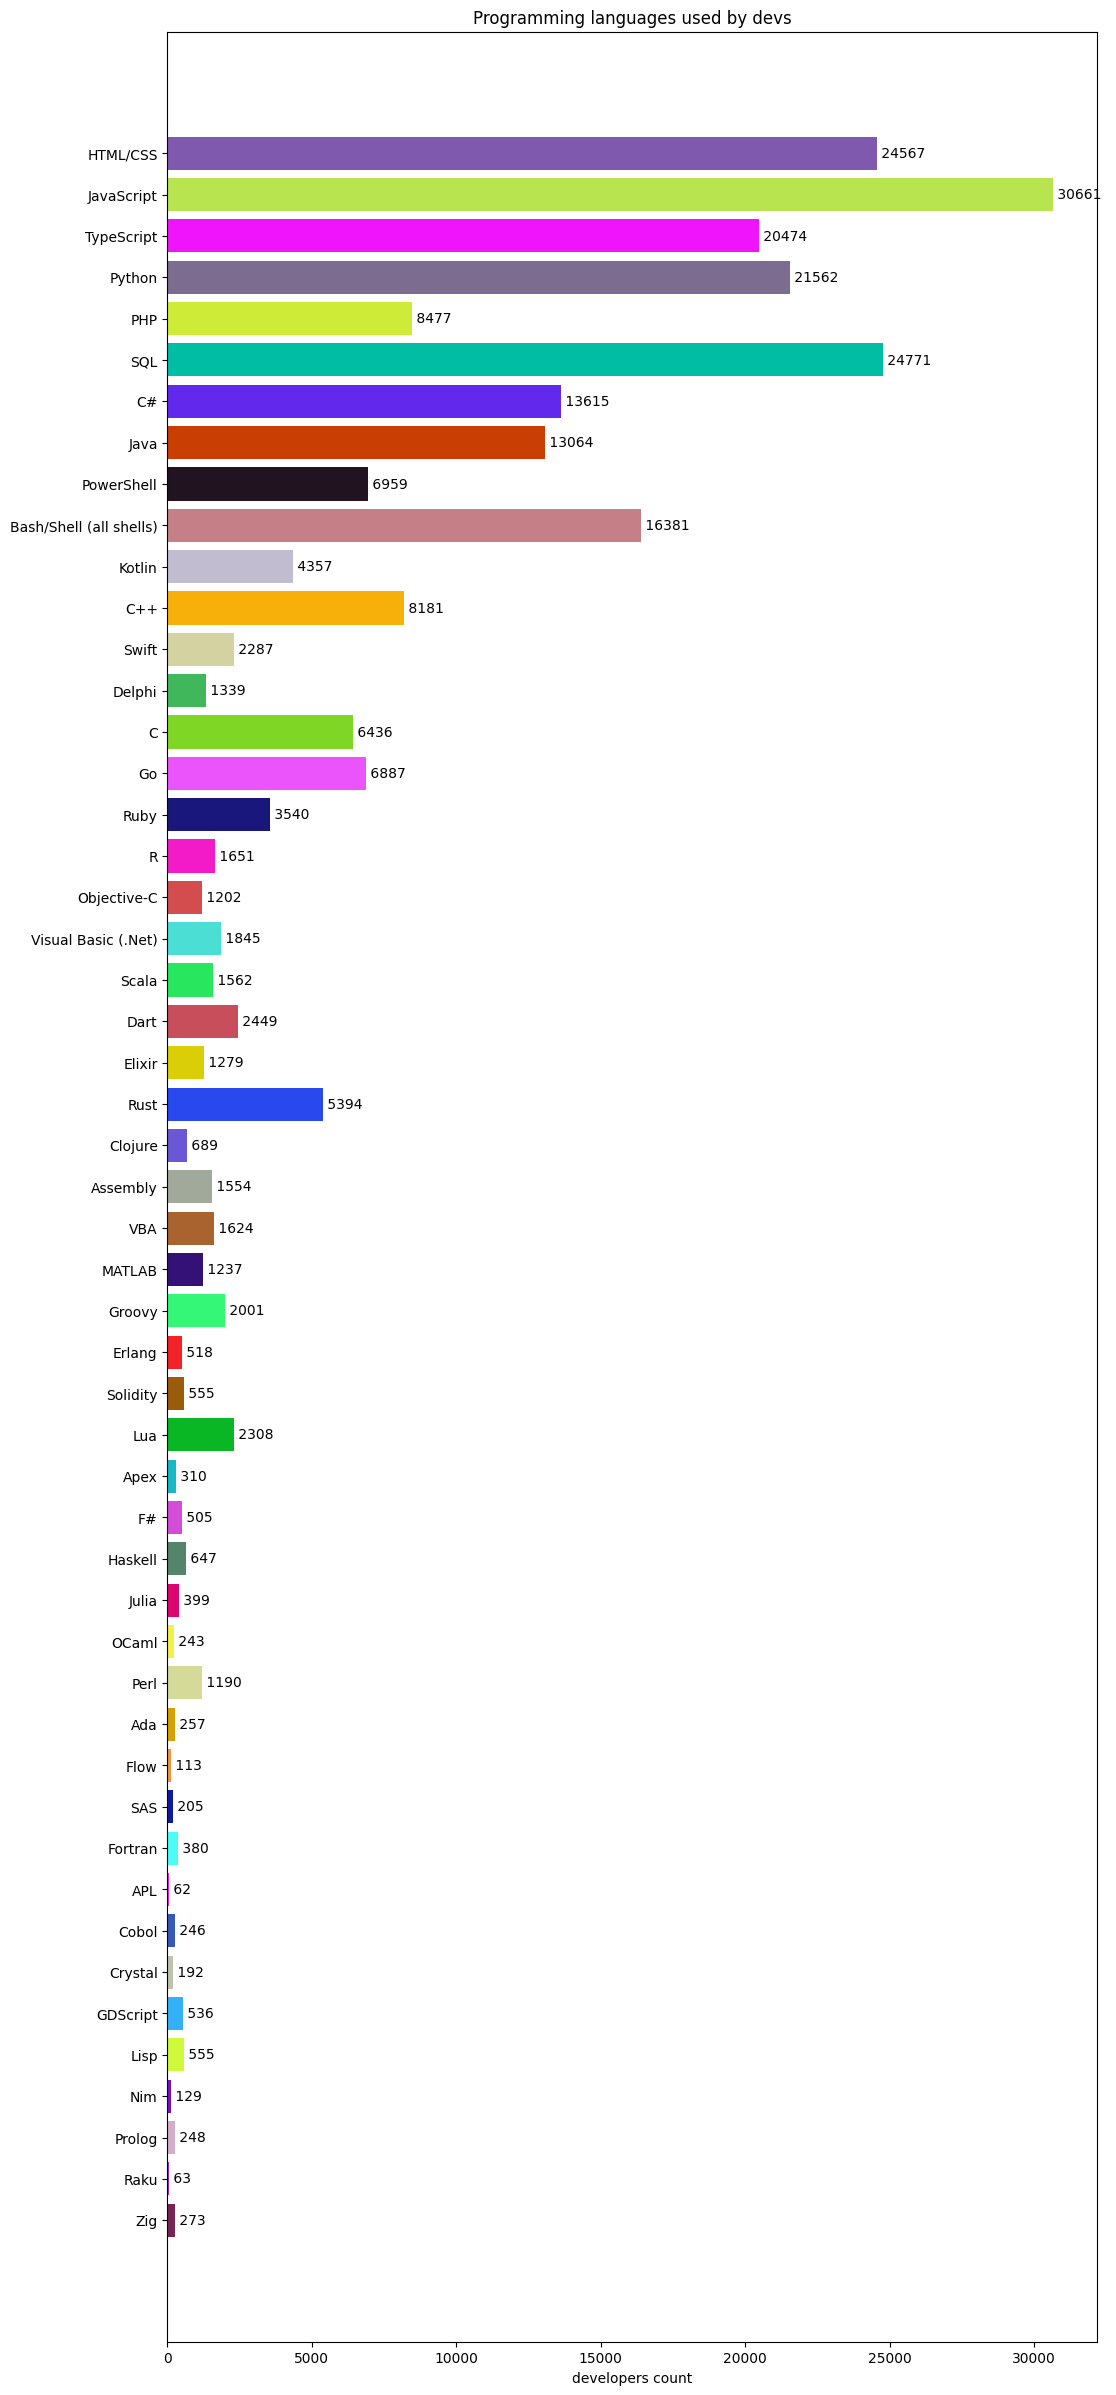

In [54]:
LCO = dict(data["LanguageHaveWorkedWith"].value_counts())
l=data["LanguageHaveWorkedWith"].shape[0]
d={}
for i, v in list(LCO.items()):
    for j in list(i.split(";")):
        d[j]=d.get(j, 0)+v
        
plot_bar_graph(
    x=list(d.keys()),
    y=list(d.values()),
    hor=True,xl=12, yl=30,
    indent=50000,
    title="Programming languages used by devs",
    xlabel="developers count",
    d={"Formal documentation provided by the owner of the tech":"Documentation by Tech owner", "Online challenges (e.g., daily or weekly coding challenges)":"Online Challenges"}
)

## 6. Distribution of Education Levels of Developers

Text(0.5, 1.0, 'Distribution of Respondents by Education Level')

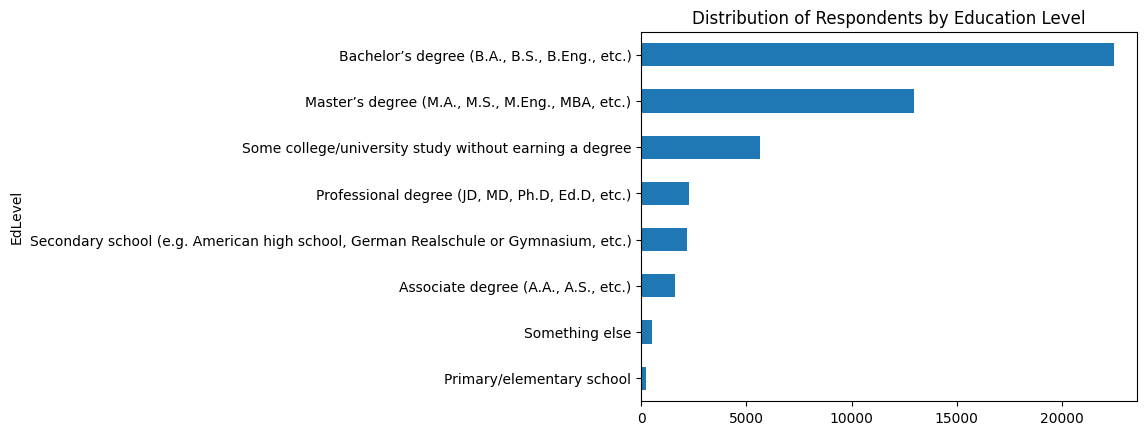

In [55]:
data['EdLevel'].value_counts().sort_values().plot(kind='barh')

plt.title('Distribution of Respondents by Education Level')

## 7. Yearly Compensation for the Database and Platform used by developers

/var/folders/t9/dsx6mv5s7kl5ybn8ps1lw3q40000gn/T/ipykernel_16932/2699039594.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




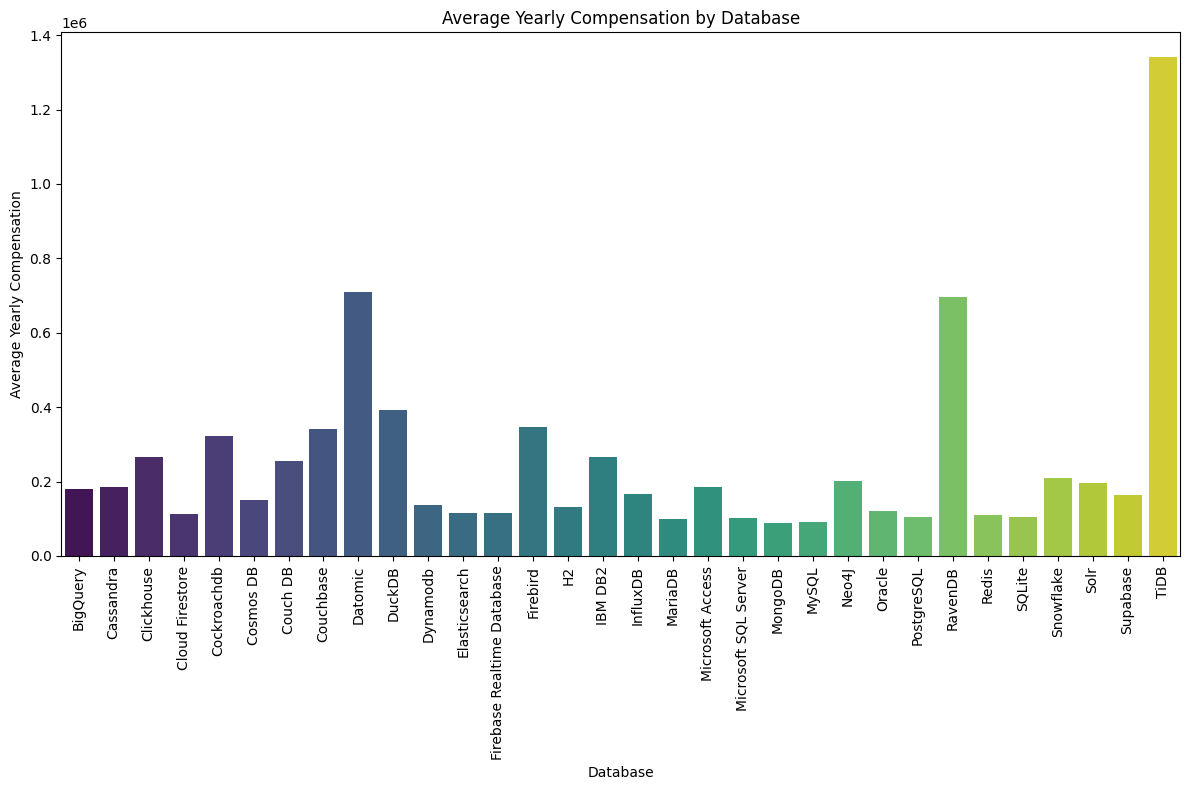

/var/folders/t9/dsx6mv5s7kl5ybn8ps1lw3q40000gn/T/ipykernel_16932/2699039594.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




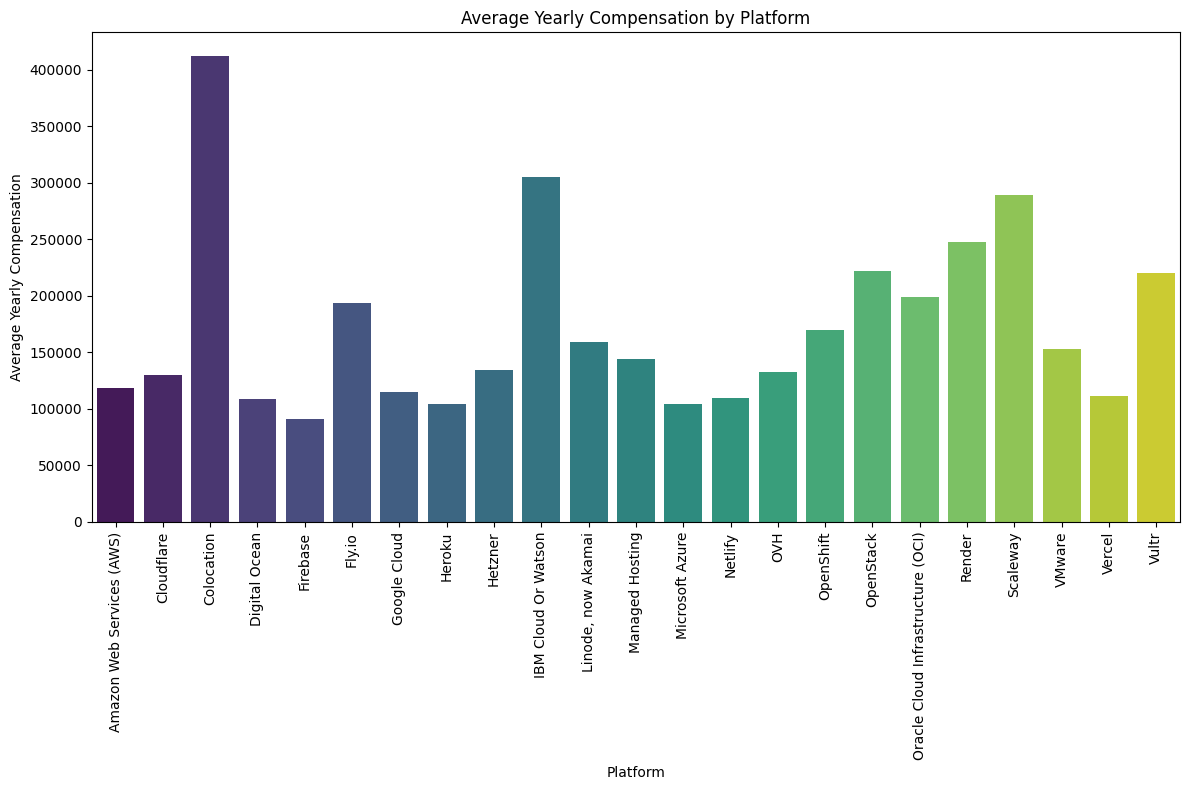

In [56]:
# Split the DatabaseHaveWorkedWith column into multiple rows
databases = data.assign(DatabaseHaveWorkedWith=data['DatabaseHaveWorkedWith'].str.split(';')).explode('DatabaseHaveWorkedWith')

compensation_by_database = databases.groupby('DatabaseHaveWorkedWith')['ConvertedCompYearly'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=compensation_by_database, x='DatabaseHaveWorkedWith', y='ConvertedCompYearly', palette='viridis')
plt.title('Average Yearly Compensation by Database')
plt.xlabel('Database')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Split the PlatformHaveWorkedWith column into multiple rows
platforms = data.assign(PlatformHaveWorkedWith=data['PlatformHaveWorkedWith'].str.split(';')).explode('PlatformHaveWorkedWith')

# Group by PlatformHaveWorkedWith and calculate the average ConvertedCompYearly
compensation_by_platform = platforms.groupby('PlatformHaveWorkedWith')['ConvertedCompYearly'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=compensation_by_platform, x='PlatformHaveWorkedWith', y='ConvertedCompYearly', palette='viridis')
plt.title('Average Yearly Compensation by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()